## Вступ

Мовні моделі класно працюють з простими задачами. І ми можемо задати їм навіть послідовність дій - chain.

Якщо ми хочемо аби LLM задавала послідовність дій - це агент.
Агентів взагалі кажучи може бути багато різних. Він або працює, як маршрутизатор - який інструмент обрати, або визначає інші послідовність дій.

![](https://drive.google.com/uc?export=view&id=1I6VGiTEewgNz6Z2j6ru5FZDAjwibVnCV)

Але є проблема - хочеться і контролювати агента і давати йому свободу. І Langgraph це дає.

![](https://drive.google.com/uc?export=view&id=1YTvRVzGsiyIVihyyihTw7K5kbQg7DddJ)

Логіка наступна:
- фіксуємо окремі стани, які нам точно треба пройти в графі - це зазвичай старт, кінець і виклик моделі. А решту станів можемо генерувати за визначеною логікою.

Граф складається з
- nodes (вузли) - може бути агент, інструмент, щось що можемо викликати,
- edges (ланки) - звʼязок між вузлами.

![](https://drive.google.com/uc?export=view&id=1Kz-X_suARuy6z7m-rORLtvD8s2dsOpBY)

https://langchain-ai.github.io/langgraph/concepts/high_level/

## Проблема однозадачного агента

Сучасні великі мовні моделі (LLM) — потужні, але обмежені, коли працюють **ізольовано**. Одному агенту складно:
- Одночасно тримати фокус на деталях і бачити загальну картину.
- Обробляти великі обсяги інформації або крок за кроком вирішувати складні завдання.
- Надійно масштабувати логіку під нові задачі.

### 💡 Рішення — взаємодія між агентами (multi-agent systems)

Це **новітній підхід**, який активно використовують багато прогресивних компаній такі як Replit, Uber, GitLab, LinkedIn, OpenAI для роботи з мовними моделями. Він передбачає:
- **Розподіл обовʼязків**: кожен агент має свою чітку роль, набір інструментів і цілі.
- **Співпрацю**: агенти обмінюються інформацією, доповнюють і коригують дії один одного.
- **Контроль**: легко відстежити, хто і що зробив, де щось пішло не так, і на якому етапі.

Це дозволяє:
- **Масштабувати** рішення без втрати контролю.
- Робити LLM-системи **надійнішими, керованішими та ефективнішими**.
- Впроваджувати **гнучку логіку**, що адаптується до задач будь-якої складності.

Тож, Multi-agent системи — це **логічна еволюція** у використанні LLM: від одного «всезнаючого» агента до **команди спеціалізованих агентів**, які спільно досягають результату.

LangGraph дозволяє організувати цю взаємодію на практиці.

## Що таке агент у контексті роботи з LLM?

**Агент** — це LLM у ролі виконавця конкретного завдання, що вміє **приймати рішення, викликати інструменти та взаємодіяти з середовищем**.

### 🔹 Агент складається з:
1. **Мовної моделі (LLM)** — наприклад, GPT-4о або Claude, яка генерує текст.
2. **Системного промпту** — що пояснює агенту його роль («Ти аналітик, який пише звіти…»).
3. **Набору інструментів (tools)** — доступ до функцій: веб-пошук, база даних, Python-код, API.
4. **Памʼяті (опціонально)** — зберігає історію попередніх дій або контекст.

### Приклад:
Агент-аналітик отримує запит «Порахуй середню зарплату в ІТ в Україні за 2024».  
Він:
- Приймає рішення використати веб-пошук.
- Парсить знайдені дані.
- Обчислює результат за допомогою Python.
- Формує підсумковий звіт.

### Важливо:  
Агент ≠ просто LLM.  
Це **LLM + логіка дій + інструменти + роль**. Агент має **ціль** і **планує кроки**, щоб її досягти.


## LangChain і LangGraph: як створювати multi-agent систем

![](https://static1.cbrimages.com/wordpress/wp-content/uploads/2018/06/Agent-Smith-replicated.jpg)

**LangChain** — це фреймворк для побудови LLM-застосунків, що поєднує моделі, інструменти, API, памʼять та іншу логіку.

Проте, коли йдеться про складні сценарії взаємодії між кількома агентами, зʼявляється потреба у чіткішій структурі. Для цього створено **LangGraph** — бібліотеку, яка дозволяє організувати багатокрокову логіку у вигляді **графа станів**.

### Що дає LangGraph:
- **Кожен вузол графа** — це агент, інструмент або певний крок у процесі.
- **Звʼязки між вузлами (edges)** — визначають, куди передається керування далі.
- Підтримка **циклів**, **умовних переходів** і **довготривалої памʼяті**.
- Можливість **залучити людину в процес прийняття рішень** (human-in-the-loop) — наприклад, для верифікації важливих кроків або втручання в разі помилки.

> 🧩 **LangGraph може працювати незалежно від LangChain** — це самостійна бібліотека, яку можна використовувати окремо або разом з LangChain, залежно від потреб.

---

🔧 У цьому туторіалі ми розглянемо кілька практичних прикладів побудови мультиагентних систем за допомогою **LangGraph**.

Ми пройдемо через **три базові сценарії**, кожен з яких покаже різні способи організації взаємодії між агентами — від простої співпраці до складної логіки з умовами та циклами.

Почнемо з встановлення всіх необхідних бібліотек 👇

In [ ]:
!pip install -U langchain_community langchain_experimental matplotlib langgraph langchain_openai langchain_anthropic --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.2/209.2 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.4/142.4 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.3/61.3 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.4/243.4 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 40.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 423.3/423.3 kB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8

### LangSmith

Багато з додатків, які ви створюєте з LangChain, міститимуть кілька етапів з кількома викликами LLM (Large Language Model).
Оскільки ці додатки стають все більш складними, стає важливим мати можливість перевірити, що саме відбувається всередині вашого ланцюга або агента.
Найкращий спосіб зробити це - за допомогою [LangSmith](https://smith.langchain.com).

LangSmith - це універсальна платформа для розробників для кожного етапу життєвого циклу додатків на основі LLM. LangSmith допомагає вам відстежувати та оцінювати ваші LLM-apps та інтелектуальних агентів, щоб допомогти вам перейти від прототипу до production.

Після реєстрації за вказаним вище посиланням, переконайтеся, що ви налаштували свої змінні середовища для початку трейсингу:

In [ ]:
import os

os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_ENDPOINT"] = "https://api.smith.langchain.com"

І також завантажуємо API-ключі для роботи в файл структури: TODO оновити набір ключіів
```
{
"OPENAI_API_KEY": "...",
"TAVILY_API_KEY": "...",
"LANGSMITH_API_KEY":"..."
}
```

Нам знадобляться ключі
- OpenAI API: https://platform.openai.com/login
- Tavily Search API: https://app.tavily.com/home

In [ ]:
import json
import os

with open('creds.json') as file:
  creds = json.load(file)

os.environ["OPENAI_API_KEY"] = creds["OPENAI_API_KEY"]
os.environ["TAVILY_API_KEY"] = creds["TAVILY_API_KEY"]
os.environ["LANGSMITH_API_KEY"] = creds["LANGSMITH_API_KEY"]

## Простий соло-агент з пошуком

Давайте для початку напишемо простого агента, який ходить в інтернет і зʼясовує питання.

### Вибір OpenAI моделі

Тут нам треба буде обрати модель OpenAI і врахувати, що вони всі коштують по-різному. Опис всіх можна знайти тут: https://platform.openai.com/docs/models . Ціни вказуються за 1M tokens.

Я обрала ChatGPT-4o-mini бо вона швиидка і дешева.

### Як прикинути скільки токенів в тексті
Аби прикинути, що то таке 10-100 токенів - переходимо на сайт - https://platform.openai.com/tokenizer

Корисним емпіричним правилом є те, що один токен зазвичай відповідає ~4 символам тексту для звичайного **англійського** тексту. Це перекладається як приблизно ¾ слова (тобто 100 токенів ~= 75 слів та ~= 400 символів).





In [ ]:
from langchain import hub
from langchain.agents import AgentExecutor
from langchain.agents.format_scratchpad.openai_tools import (
    format_to_openai_tool_messages,
)
from langchain.agents.output_parsers.openai_tools import OpenAIToolsAgentOutputParser
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_openai import ChatOpenAI

# Беремо промпт для нашого агенту з хабу
prompt = hub.pull("wfh/langsmith-agent-prompt:5d466cbc")

llm = ChatOpenAI(
    model="gpt-4o-mini",
    # model="gpt-3.5-turbo-16k", # можна спробувати простішу модель і подивитись, як це вплине на результати
)

tools = [
    TavilySearchResults(
        name="tavily_search"
    ),  # Пошук в інтернеті з Tavily Search
]

llm_with_tools = llm.bind_tools(tools)

runnable_agent = (
    {
        "input": lambda x: x["input"],
        "agent_scratchpad": lambda x: format_to_openai_tool_messages(
            x["intermediate_steps"]
        ),
    }
    | prompt
    | llm_with_tools
    | OpenAIToolsAgentOutputParser()
)

agent_executor = AgentExecutor(
    agent=runnable_agent, tools=tools, handle_parsing_errors=True
)

Можемо глянути промпт:

In [ ]:
prompt

ChatPromptTemplate(input_variables=['agent_scratchpad', 'input'], input_types={'agent_scratchpad': list[typing.Annotated[typing.Union[typing.Annotated[langchain_core.messages.ai.AIMessage, Tag(tag='ai')], typing.Annotated[langchain_core.messages.human.HumanMessage, Tag(tag='human')], typing.Annotated[langchain_core.messages.chat.ChatMessage, Tag(tag='chat')], typing.Annotated[langchain_core.messages.system.SystemMessage, Tag(tag='system')], typing.Annotated[langchain_core.messages.function.FunctionMessage, Tag(tag='function')], typing.Annotated[langchain_core.messages.tool.ToolMessage, Tag(tag='tool')], typing.Annotated[langchain_core.messages.ai.AIMessageChunk, Tag(tag='AIMessageChunk')], typing.Annotated[langchain_core.messages.human.HumanMessageChunk, Tag(tag='HumanMessageChunk')], typing.Annotated[langchain_core.messages.chat.ChatMessageChunk, Tag(tag='ChatMessageChunk')], typing.Annotated[langchain_core.messages.system.SystemMessageChunk, Tag(tag='SystemMessageChunk')], typing.Ann

І запустимо кілька запитів до нашої системи.

In [ ]:
inputs = [
    "What is LangChain?",
    "What's LangSmith?",
    # "When was Llama-v2 released?",
    # "What is the langsmith cookbook?",
    # "When did langchain first announce the hub?",
]

results = agent_executor.batch([{"input": x} for x in inputs], return_exceptions=True)

Можемо переглянути в LangSmith, що відбувалось тут під капотом: https://smith.langchain.com/

----------


В лангграфі - ми можемо задавати будь-які ноди (робочі обʼєкти) і налаштовувати між ними взаємодію.

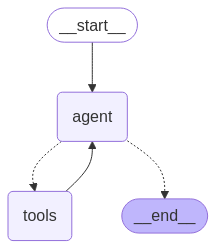

In [ ]:
from typing import Literal
from IPython.display import Image, display

from langchain_core.messages import HumanMessage
from langchain_openai import ChatOpenAI
from langchain_core.tools import tool
from langgraph.graph import StateGraph, MessagesState
from langgraph.prebuilt import ToolNode

@tool
def search(query: str):
    """Call to surf the web."""
    if "sf" in query.lower() or "san francisco" in query.lower():
        return "It's 60 degrees and foggy."
    return "It's 90 degrees and sunny."

tools = [search]

tool_node = ToolNode(tools)

model = ChatOpenAI(model="gpt-4o-mini", temperature=0).bind_tools(tools)

def should_continue(state: MessagesState) -> Literal["tools", "__end__"]:
    messages = state['messages']
    last_message = messages[-1]
    # якщо агент вирішує використовувати інструмент, то хочемо продовжувати
    if last_message.tool_calls:
        return "tools"
    return "__end__"


def call_model(state: MessagesState):
    messages = state['messages']

    # Виклик `model` автоматично виявить правильний поточний контекст
    response = model.invoke(messages)
    return {"messages": [response]}


workflow = StateGraph(MessagesState)

workflow.add_node("agent", call_model)
workflow.add_node("tools", tool_node)

workflow.add_edge("__start__", "agent")
# якщо агент вирішує використовувати інструмент, то будемо продовжувати
workflow.add_conditional_edges(
    "agent",
    should_continue,
)
workflow.add_edge("tools", 'agent')

graph = workflow.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
final_state = graph.invoke(
    {"messages": [HumanMessage(content="what is the weather in kyiv")]},
    config={"configurable": {"thread_id": 42}}
)
final_state["messages"][-1].content

'The weather in Kyiv is currently 90 degrees and sunny.'

Дослідити, яка була послідовність викликів можна в langsmith: https://smith.langchain.com/

--------

Налаштуємо тепер інструмент REPL для нашої мультиагентної системи.

REPL = Read–eval–print loop

In [ ]:
from typing import Annotated

from langchain_core.tools import tool
from langchain_experimental.utilities import PythonREPL

tavily_tool = TavilySearchResults(max_results=5)

repl = PythonREPL()


@tool
def python_repl_tool(
    code: Annotated[str, "Python код для виконання, щоб згенерувати ваш графік."],
):
    """Використовуйте цю частину для виконання python коду. Якщо ви хочете побачити значення аутпуту,
    ви повинні вивести його за допомогою `print(...)`. """
    try:
        result = repl.run(code)
    except BaseException as e:
        return f"Не вдалося виконати. Помилка: {repr(e)}"
    result_str = f"Успішно виконано:\n```python\n{code}\n```\nStdout: {result}"
    return (
        result_str + "\n\nЯкщо ви завершили всі завдання, відповідай з ОСТАННЬОЮ ВІДПОВІДДЮ."
    )

## Створюємо граф мультиагентної системи. Приклад 1. Multi-Agent Collaboration

Тепер, коли ми визначили наші інструменти та створили кілька допоміжних функцій, ми створимо окремих агентів нижче і скажемо їм, як спілкуватися один з одним, використовуючи LangGraph.

У цьому прикладі ми створюємо просту систему співпраці кількох агентів.

- Агенти працюють над спільною "чернеткою" (scratchpad) повідомлень.
- Кожен бачить весь накопичений стан — усі повідомлення попередніх агентів.
- Це дає змогу легко обмінюватися проміжними результатами.
- Мінус — іноді інформації може бути забагато, і достатньо лише фінального результату.

> Такий підхід називається **collaboration**, бо агенти реально працюють разом над однією памʼяттю.

---

## Хто такі ці агенти?

У цьому прикладі агенти — це насправді просто окремі виклики до LLM, кожен зі своїм:
- системним промптом (роль),
- набором інструментів (tools),
- логікою обробки.

---

## Як агенти пов'язані між собою?

Ось спрощена схема:

![](https://drive.google.com/uc?export=view&id=1UCXJE-TDDk3x-3ZfOToXQ-U4kfAUhB9y)

- Користувач задає запит.
- Спочатку працює агент-дослідник.
- Потім залежно від контексту результат обробляється:
    - або іншим агентом (Chart Generator),
    - або інструментом (Call Tool),
    - або повертається одразу користувачеві (Final Answer).
    
### Ключова роль: Router
Саме **router** керує тим, хто буде наступним агентом, чи потрібно викликати інструмент, чи повернути відповідь.

---

Далі ми перейдемо до ще двох прикладів:  
- агентна система з координатором (supervisor)
- ієрархічна багаторівнева команда агентів

Ці сценарії покажуть інші підходи до побудови multi-agent архітектур.





### Визначення агентних вузлів (nodes)

Нам потрібно визначити вузли.

Спочатку ми створимо утиліту для створення системного запиту для кожного агента.

In [ ]:
def make_system_prompt(suffix: str) -> str:
    return (
        "Ви корисний AI асистент, який співпрацює з іншими асистентами."
        " Використовуйте надані інструменти, щоб просуватися до відповіді на запитання."
        " Якщо ви не можете повністю відповісти, це нормально, інший асистент з іншими інструментами "
        " допоможе там, де ви зупинилися. Виконуйте те, що можете, щоб зробити прогрес."
        " Якщо ви або будь-які інші асистенти маєте остаточну відповідь або результат,"
        " додайте до вашої відповіді префікс FINAL ANSWER, щоб команда знала, що зупинитися."
        f"\n{suffix}"
    )

In [ ]:
from typing import Literal

from langchain_core.messages import BaseMessage, HumanMessage
from langchain_openai import ChatOpenAI
from langgraph.prebuilt import create_react_agent
from langgraph.graph import MessagesState, END
from langgraph.types import Command


llm = ChatOpenAI(model="gpt-4o-mini")


def get_next_node(last_message: BaseMessage, goto: str):
    if "FINAL ANSWER" in last_message.content:
        # Будь-який агент вирішив, що робота завершена
        return END
    return goto


# Агент-дослідник та вузол
research_agent = create_react_agent(
    llm,
    tools=[tavily_tool],
    prompt=make_system_prompt(
        "Ви можете лише проводити дослідження. Ви працюєте з колегою, який генерує графіки."
    ),
)


def research_node(
    state: MessagesState,
) -> Command[Literal["chart_generator", END]]:
    result = research_agent.invoke(state)
    goto = get_next_node(result["messages"][-1], "chart_generator")
    # обертаємо в людське повідомлення, оскільки не всі постачальники дозволяють
    # повідомлення ШІ на останній позиції списку вхідних повідомлень
    result["messages"][-1] = HumanMessage(
        content=result["messages"][-1].content, name="researcher"
    )
    return Command(
        update={
            # ділитися внутрішньою історією повідомлень агента дослідження з іншими агентами
            "messages": result["messages"],
        },
        goto=goto,
    )


# Агент генерації графіків та вузол
# ЗАУВАЖЕННЯ: ЦЕ ВИКОНУЄ ДОВІЛЬНЕ ВИКОНАННЯ КОДУ, ЩО МОЖЕ БУТИ НЕНАДІЙНИМ, КОЛИ НЕ В САНДБОКСІ
chart_agent = create_react_agent(
    llm,
    [python_repl_tool],
    prompt=make_system_prompt(
        "Ви можете лише генерувати графіки. Ви працюєте з колегою-дослідником."
    ),
)


def chart_node(state: MessagesState) -> Command[Literal["researcher", END]]:
    result = chart_agent.invoke(state)
    goto = get_next_node(result["messages"][-1], "researcher")
    # обертаємо в людське повідомлення, оскільки не всі постачальники дозволяють
    # повідомлення ШІ на останній позиції списку вхідних повідомлень
    result["messages"][-1] = HumanMessage(
        content=result["messages"][-1].content, name="chart_generator"
    )
    return Command(
        update={
            # ділитися внутрішньою історією повідомлень агента графіків з іншими агентами
            "messages": result["messages"],
        },
        goto=goto,
    )

In [ ]:
llm.model_name

'gpt-4o-mini'

### Визначаємо граф

Тепер ми можемо зібрати все разом і визначити граф.

In [ ]:
from langgraph.graph import StateGraph, START

# Створення графа станів
workflow = StateGraph(MessagesState)
# Додавання вузла дослідника
workflow.add_node("researcher", research_node)
# Додавання вузла генератора графіків
workflow.add_node("chart_generator", chart_node)

# Додавання ребра від початку до дослідника
workflow.add_edge(START, "researcher")
# Компіляція графа
graph = workflow.compile()

Можемо переглянути створений граф ось так:

In [ ]:
from IPython.display import Image, display

def get_workflow_image(graph):
  try:
      display(Image(graph.get_graph().draw_mermaid_png()))
  except Exception:
      # Це вимагає деяких додаткових залежностей і є необов'язковим
      pass

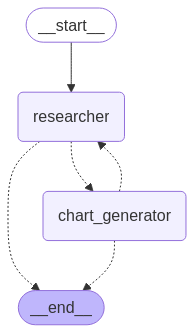

In [ ]:
get_workflow_image(graph)

## Виклик
Викликаємо створений граф. Нехай він побудує для нас деякі статистичні дані.

{'researcher': {'messages': [HumanMessage(content='Спочатку отримайте ВВП Великобританії за останні 5 років, а потім створіть лінійний графік цього. Коли ви створите графік, закінчіть.', additional_kwargs={}, response_metadata={}, id='1fed5445-601b-4b1b-aec8-172c2987d82a'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_pHbJ9uEpKyQTkfEzMh2k6X7f', 'function': {'arguments': '{"query":"ВВП Великобританії останні 5 років"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 30, 'prompt_tokens': 301, 'total_tokens': 331, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_86d0290411', 'id': 'chatcmpl-BIwiMvYAZDoHGOPhv4MSvbJwgaCpE', 'finish_reason': 'tool_calls', 'logpro

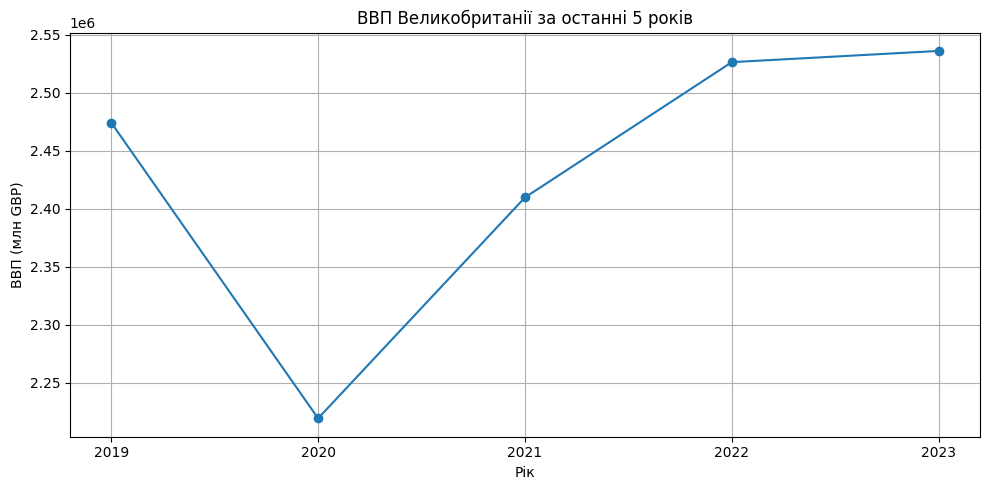

{'chart_generator': {'messages': [HumanMessage(content='Спочатку отримайте ВВП Великобританії за останні 5 років, а потім створіть лінійний графік цього. Коли ви створите графік, закінчіть.', additional_kwargs={}, response_metadata={}, id='1fed5445-601b-4b1b-aec8-172c2987d82a'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_pHbJ9uEpKyQTkfEzMh2k6X7f', 'function': {'arguments': '{"query":"ВВП Великобританії останні 5 років"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 30, 'prompt_tokens': 301, 'total_tokens': 331, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_86d0290411', 'id': 'chatcmpl-BIwiMvYAZDoHGOPhv4MSvbJwgaCpE', 'finish_reason': 'tool_calls', 'l

In [ ]:
events = graph.stream(
    {
        "messages": [
            (
                "user",
                "Спочатку отримайте ВВП Великобританії за останні 5 років, а потім створіть лінійний графік цього. "
                "Коли ви створите графік, закінчіть.",
            )
        ],
    },
    # Максимальна кількість кроків, які можна зробити в графі
    {"recursion_limit": 150},
)
for s in events:
    print(s)
    print("----")

Зверніть увагу - наскільки вища стала ціна! Це через те, що ми багато робили запитів аби побудувати цей графік.

------


## Приклад 2: Agent Supervisor

У цьому прикладі агенти також співпрацюють, але вже **без спільної чернетки** (scratchpad).  
Кожен агент:
- має **свою власну памʼять** (окремий scratchpad);
- працює незалежно;
- повертає лише фінальний результат до спільної глобальної памʼяті.

Таким чином, агенти бачать тільки підсумки роботи один одного, але не усі проміжні кроки.

---

## Хто такі агенти у цьому випадку?

Це вже повноцінні агенти LangChain, а не прості LLM-виклики:
- У кожного свій системний промпт.
- Своя модель (або конфігурація).
- Свій набір інструментів (tools).
- Виконання відбувається через **AgentExecutor** — тобто агент сам вирішує, як обробити запит, які інструменти застосувати і коли зупинитися.

---

## Як агенти повʼязані між собою?

У цій схемі є **agent supervisor** — координатор:
- Він отримує завдання і вирішує, якого агента залучити.
- Після цього агент виконує завдання і повертає фінальний результат координатору.
- Координатор або завершує роботу, або викликає іншого агента.

> Насправді, supervisor — це теж агент, чий набір інструментів — це інші агенти!

Схема виглядатиме наступним чином

![](https://drive.google.com/uc?export=view&id=11zE4NKo-IkqSK041ptn4s1uWvzyAi2XT)
---


In [ ]:
from typing import Literal
from typing_extensions import TypedDict

from langchain_openai import ChatOpenAI
from langgraph.graph import MessagesState, END
from langgraph.types import Command


members = ["researcher", "coder"]
# Наш керівник команди - це вузол LLM. Він просто вибирає наступного агента для обробки
# і вирішує, коли робота завершена
options = members + ["FINISH"]

system_prompt = (
    "Ви є керівником, завданням якого є управління розмовою між"
    f" наступними працівниками: {members}. Виходячи з наступного запиту користувача,"
    " відповідайте, який працівник має діяти далі. Кожен працівник виконає"
    " завдання і відповість зі своїми результатами та статусом. Коли закінчите,"
    " відповідайте FINISH."
)


class Router(TypedDict):
    """Worker to route to next. If no workers needed, route to FINISH."""
    next: Literal[*options]


llm = ChatOpenAI(
    model="gpt-4o-mini",
    # model="gpt-3.5-turbo-16k", # задаємо модель аби просто ходити в інтернет
    temperature=0,
)


class State(MessagesState):
    next: str


def supervisor_node(state: State) -> Command[Literal[*members, "__end__"]]:
    messages = [
        {"role": "system", "content": system_prompt},
    ] + state["messages"]
    response = llm.with_structured_output(Router).invoke(messages)
    goto = response["next"]
    if goto == "FINISH":
        goto = END

    return Command(goto=goto, update={"next": goto})

### Побудова графа

Ми готові почати будувати граф. Нижче визначте вузли стану та робітників, використовуючи функцію, яку ми щойно визначили.

In [ ]:
from langchain_core.messages import HumanMessage
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import create_react_agent


research_agent = create_react_agent(
    llm, tools=[tavily_tool], prompt="Ви дослідник. НЕ виконуйте жодних математичних обчислень."
)


def research_node(state: State) -> Command[Literal["supervisor"]]:
    result = research_agent.invoke(state)
    return Command(
        update={
            "messages": [
                HumanMessage(content=result["messages"][-1].content, name="researcher")
            ]
        },
        goto="supervisor",
    )


code_agent = create_react_agent(llm, tools=[python_repl_tool])


def code_node(state: State) -> Command[Literal["supervisor"]]:
    result = code_agent.invoke(state)
    return Command(
        update={
            "messages": [
                HumanMessage(content=result["messages"][-1].content, name="coder")
            ]
        },
        goto="supervisor",
    )


builder = StateGraph(State)
builder.add_edge(START, "supervisor")
builder.add_node("supervisor", supervisor_node)
builder.add_node("researcher", research_node)
builder.add_node("coder", code_node)
graph = builder.compile()

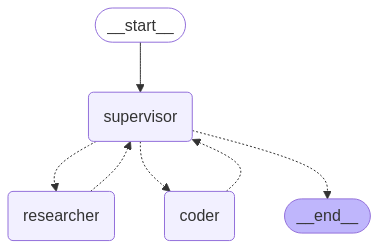

In [ ]:
get_workflow_image(graph)

In [ ]:
for s in graph.stream(
    {"messages": [("user", "Який квадратний корінь з 42?")]}, subgraphs=True
):
    print(s)
    print("----")

((), {'supervisor': {'next': 'researcher'}})
----
(('researcher:095a9f7c-e8c5-fb7c-3dc7-98975bbfa561',), {'agent': {'messages': [AIMessage(content='Я не можу виконувати математичні обчислення, але можу допомогти знайти інформацію про квадратний корінь з 42 або пояснити, як його обчислити. Якщо вам це потрібно, дайте знати!', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 56, 'prompt_tokens': 110, 'total_tokens': 166, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_b376dfbbd5', 'id': 'chatcmpl-BIwpMh5DrAoQAB6HNW4kZV8hBAOdN', 'finish_reason': 'stop', 'logprobs': None}, id='run-8114fc4b-e954-4707-8380-0363e21b69f8-0', usage_metadata={'input_tokens': 110, 'output_tokens': 56, 'total_tokens': 166, 'input_token_details': {'aud

In [ ]:
for s in graph.stream(
    {
        "messages": [
            (
                "user",
                "Знайдіть останній ВВП Нью-Йорка та Каліфорнії, а потім обчисліть середнє",
            )
        ]
    },
    subgraphs=True,
):
    print(s)
    print("----")

((), {'supervisor': {'next': 'researcher'}})
----
(('researcher:2c4accf2-fbcb-4e26-74f4-116f667ae3eb',), {'agent': {'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_w3e0VN2qPYtroLJHoYxnZu5Q', 'function': {'arguments': '{"query": "GDP of New York 2023"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}, {'id': 'call_jOn9nAZqMnllKwNcHcwNz9Oe', 'function': {'arguments': '{"query": "GDP of California 2023"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 64, 'prompt_tokens': 128, 'total_tokens': 192, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_b376dfbbd5', 'id': 'chatcmpl-BIwqqNGL5au7bdByg4RcHppvq0Jw7', 'finish_reason': 'tool_calls', '


---

## Приклад 3: Hierarchical Agent Teams

Цей приклад дуже схожий на попередній, але ще на крок складніший.  
Тут у вузлах графа замість окремих агентів вже можуть бути цілі **команди агентів**, оформлені як окремі LangGraph-підграфи.

Це дозволяє:
- Створювати ще більш гнучкі та масштабовані системи.
- Комбінувати як **LangChain AgentExecutor**, так і інші підграфи всередині одного великого графа.

Ми називаємо це **hierarchical agent teams**, бо фактично будуємо не просто набір агентів, а **команду команд**.

---

## Хто такі агенти у цьому прикладі?

Тепер агенти — це навіть не окремі LLM-запити чи AgentExecutor-и, а **інші графи LangGraph**, що працюють як підсистеми:
- Вони можуть містити власних агентів, маршрутизацію, стан і навіть локальну памʼять.
- Такі підграфи можуть виконувати роль цілого підпроцесу.

---

## Як агенти повʼязані між собою?

Як і в попередньому прикладі, є **supervisor**, який керує підграфами:
- Він вирішує, яку "команду" викликати для виконання певного завдання.
- Кожен підграф самостійно вирішує, як впоратися із завданням.

---

### Загальна ідея:
> Ми будуємо багаторівневу систему:  
> supervisor ➤ підграф ➤ агенти підграфа ➤ інструменти.

Виглядає якось так
![](https://blog.langchain.dev/content/images/2024/01/hierarchical-diagram.png)


## Створюємо інструменти

Кожна команда буде складатися з одного або кількох агентів, кожен з яких має один або кілька інструментів. Нижче ми визначаємо всі інструменти, які будуть використовуватися нашими різними командами.

Розпочнемо з команди дослідників.

**Інструменти команди дослідників**

Команда дослідниківф може використовувати пошукову систему та скрапер URL для пошуку інформації в Інтернеті. Можна поекспериментувати і накинути їм [тулзів](https://python.langchain.com/docs/integrations/tools/), щоб підвищити продуктивність команди!

In [ ]:
from typing import Annotated, List

from langchain_community.document_loaders import WebBaseLoader
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_core.tools import tool

tavily_tool = TavilySearchResults(max_results=5)


@tool
def scrape_webpages(urls: List[str]) -> str:
    """Використовує requests та bs4 для збору інформації з наданих веб-сторінок."""
    loader = WebBaseLoader(urls)
    docs = loader.load()
    return "\n\n".join(
        [
            f'<Document name="{doc.metadata.get("title", "")}">\n{doc.page_content}\n</Document>'
            for doc in docs
        ]
    )

**Інструменти для команди написання документів**

Далі ми надамо кілька інструментів для команди, яка пише документи.
Нижче ми визначаємо деякі базові інструменти доступу до файлів.

Зверніть увагу, що це надає агентам доступ до вашої файлової системи, що може бути не завжди безпечно.

In [ ]:
# with (WORKING_DIRECTORY / 'test.txt').open("w") as file:
#     file.write('abc')

In [ ]:
from pathlib import Path
# from tempfile import TemporaryDirectory
from typing import Dict, Optional

from langchain_experimental.utilities import PythonREPL
from typing_extensions import TypedDict

# _TEMP_DIRECTORY = TemporaryDirectory()
# WORKING_DIRECTORY = Path(_TEMP_DIRECTORY.name)
WORKING_DIRECTORY = Path(os.getcwd())


@tool
def create_outline(
    points: Annotated[List[str], "List of main points or sections."],
    file_name: Annotated[str, "File path to save the outline."],
) -> Annotated[str, "Path of the saved outline file."]:
    """Створити і зберегти аутлайн документа"""
    with (WORKING_DIRECTORY / file_name).open("w") as file:
        for i, point in enumerate(points):
            file.write(f"{i + 1}. {point}\n")
    return f"Аутлайн збережено в {file_name}"


@tool
def read_document(
    file_name: Annotated[str, "File path to read the document from."],
    start: Annotated[Optional[int], "The start line. Default is 0"] = None,
    end: Annotated[Optional[int], "The end line. Default is None"] = None,
) -> str:
    """Читання зазначеного документу"""
    with (WORKING_DIRECTORY / file_name).open("r") as file:
        lines = file.readlines()
    if start is None:
        start = 0
    return "\n".join(lines[start:end])


@tool
def write_document(
    content: Annotated[str, "Text content to be written into the document."],
    file_name: Annotated[str, "File path to save the document."],
) -> Annotated[str, "Path of the saved document file."]:
    """Створити і зберегти документ."""
    with (WORKING_DIRECTORY / file_name).open("w") as file:
        file.write(content)
    return f"Документ збережено в {file_name}"


@tool
def edit_document(
    file_name: Annotated[str, "Path of the document to be edited."],
    inserts: Annotated[
        Dict[int, str],
        "Dictionary where key is the line number (1-indexed) and value is the text to be inserted at that line.",
    ],
) -> Annotated[str, "Path of the edited document file."]:
    """Редагування документа, вставляючи текст у певні рядки за номером."""

    with (WORKING_DIRECTORY / file_name).open("r") as file:
        lines = file.readlines()

    sorted_inserts = sorted(inserts.items())

    for line_number, text in sorted_inserts:
        if 1 <= line_number <= len(lines) + 1:
            lines.insert(line_number - 1, text + "\n")
        else:
            return f"Error: Лінія номер {line_number} поза ренджем документу."

    with (WORKING_DIRECTORY / file_name).open("w") as file:
        file.writelines(lines)

    return f"Документ відредаговано і збережено в {file_name}"


# Warning: ця частина чудово працює локально, але може бути не зовсім чудово в сендбоксі

repl = PythonREPL()


@tool
def python_repl_tool(
    code: Annotated[str, "The python code to execute to generate your chart."],
):
    """Використовуйте цю частину для виконання python коду. Якщо ви хочете побачити значення аутпуту,
    ви повинні вивести його за допомогою `print(...)`. """
    try:
        result = repl.run(code)
    except BaseException as e:
        return f"Не вдалося виконати. Помилка: {repr(e)}"
    return f"Успішно виконано:\n```python\n{code}\n```\nStdout: {result}"

## Допоміжні утиліти
Ми створимо кілька утилітних функцій, щоб зробити код компактнішим і зрозумілішим у випадках, коли потрібно:

- Створити робочого агента.
- Створити наглядача (supervisor) для підграфа.

Це дозволить спростити фінальну композицію графа, щоб легше було розібратися, що саме відбувається.



In [ ]:
from typing import List, Optional, Literal
from langchain_core.language_models.chat_models import BaseChatModel

from langgraph.graph import StateGraph, MessagesState, START, END
from langgraph.types import Command
from langchain_core.messages import HumanMessage, trim_messages


class State(MessagesState):
    next: str


def make_supervisor_node(llm: BaseChatModel, members: list[str]) -> str:
    options = ["FINISH"] + members
    system_prompt = (
        "Ви є керівником, завданням якого є управління розмовою між"
        f" наступними працівниками: {members}. Виходячи з наступного запиту користувача,"
        " відповідайте, який працівник має діяти далі. Кожен працівник виконає"
        " завдання і відповість зі своїми результатами та статусом. Коли закінчите,"
        " відповідайте FINISH."
    )

    class Router(TypedDict):
        """Воркер, аби направляти - куди далі. Якщо працівники не потрібні, направити до FINISH."""
        next: Literal[*options]

    def supervisor_node(state: State) -> Command[Literal[*members, "__end__"]]:
        """Маршрутизатор на основі LLM."""
        messages = [
            {"role": "system", "content": system_prompt},
        ] + state["messages"]
        response = llm.with_structured_output(Router).invoke(messages)
        goto = response["next"]
        if goto == "FINISH":
            goto = END

        return Command(goto=goto, update={"next": goto})

    return supervisor_node

## Визначаємо команди агентів

Тепер ми можемо визначити наші ієрархічні команди. Тут великий простір для творчості. Ми розглянемо кілька прикладів.

### Дослідницька команда

Дослідницька команда матиме агента з пошуку та агента веб-скрапінгу "research_agent" як два робочі вузли. Давайте створимо їх, а також керівника команди.

In [ ]:
from langchain_core.messages import HumanMessage
from langchain_openai import ChatOpenAI
from langgraph.prebuilt import create_react_agent

llm = ChatOpenAI(model="gpt-4o")

search_agent = create_react_agent(llm, tools=[tavily_tool])

def search_node(state: State) -> Command[Literal["supervisor"]]:
    result = search_agent.invoke(state)
    return Command(
        update={
            "messages": [
                HumanMessage(content=result["messages"][-1].content, name="search")
            ]
        },
        # Ми хочемо, щоб наші працівники завжди "поверталися" до керівника, коли закінчать
        goto="supervisor",
    )


web_scraper_agent = create_react_agent(llm, tools=[scrape_webpages])


def web_scraper_node(state: State) -> Command[Literal["supervisor"]]:
    result = web_scraper_agent.invoke(state)
    return Command(
        update={
            "messages": [
                HumanMessage(content=result["messages"][-1].content, name="web_scraper")
            ]
        },
        # Ми хочемо, щоб наші працівники завжди "поверталися" до керівника, коли закінчать
        goto="supervisor",
    )


research_supervisor_node = make_supervisor_node(llm, ["search", "web_scraper"])

Тепер, коли ми створили необхідні компоненти, визначити їх взаємодії легко. Додайте вузли до графа команди та визначте ребра, які визначають критерії переходу.

In [ ]:
research_builder = StateGraph(State)
# Додаємо вузол "супервізора"
research_builder.add_node("supervisor", research_supervisor_node)
# Додаємо вузол "дослідника"
research_builder.add_node("search", search_node)
# Додаємо вузол "веб-скрапер"
research_builder.add_node("web_scraper", web_scraper_node)

# Додаємо ребро від START до "наукового керівника"
research_builder.add_edge(START, "supervisor")
# Компонуємо граф дослідження
research_graph = research_builder.compile()

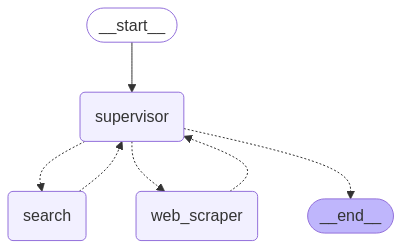

In [ ]:
from IPython.display import Image, display

# Відобразити графік дослідження у форматі PNG
display(Image(research_graph.get_graph().draw_mermaid_png()))

Ми можемо передати цю командну роботу безпосередньо. Спробуйте нижче.

In [ ]:
for s in research_graph.stream(
    {"messages": [("user", "коли наступний тур Тейлор Свіфт?")]},
    {"recursion_limit": 100},
):
    print(s)
    print("---")

{'supervisor': {'next': 'search'}}
---
{'search': {'messages': [HumanMessage(content='Тейлор Свіфт розпочала свій "Eras Tour" у 2023 році, який тривав до 9 серпня в Лос-Анджелесі. Однак, були додані нові дати в США для 2024 року. Ці події відбудуться в Маямі з 18 по 20 жовтня, в Новому Орлеані з 25 по 27 жовтня, та в Індіанаполісі з 1 по 3 листопада 2024 року. На наступний 2024 рік заплановані також міжнародні дати у Токіо в лютому.', additional_kwargs={}, response_metadata={}, name='search', id='5a0046ff-4d77-4eef-a1eb-36fa4f29859e')]}}
---
{'supervisor': {'next': '__end__'}}
---


### Команда написання документів

Створимо команду написання документів, використовуючи подібний підхід. Цього разу ми надамо кожному агенту доступ до різних інструментів для написання файлів.

Зверніть увагу, що ми надаємо доступ до файлової системи нашому агенту, що не є безпечним у всіх випадках.

In [ ]:
llm = ChatOpenAI(model="gpt-4o")

doc_writer_agent = create_react_agent(
    llm,
    tools=[write_document, edit_document, read_document],
    prompt=(
        "You can read, write and edit documents based on note-taker's outlines. "
        "Don't ask follow-up questions."
    ),
)


def doc_writing_node(state: State) -> Command[Literal["supervisor"]]:
    result = doc_writer_agent.invoke(state)
    return Command(
        update={
            "messages": [
                HumanMessage(content=result["messages"][-1].content, name="doc_writer")
            ]
        },
        goto="supervisor",
    )


note_taking_agent = create_react_agent(
    llm,
    tools=[create_outline, read_document],
    prompt=(
        "You can read documents and create outlines for the document writer. "
        "Don't ask follow-up questions."
    ),
)


def note_taking_node(state: State) -> Command[Literal["supervisor"]]:
    result = note_taking_agent.invoke(state)
    return Command(
        update={
            "messages": [
                HumanMessage(content=result["messages"][-1].content, name="note_taker")
            ]
        },
        goto="supervisor",
    )


chart_generating_agent = create_react_agent(
    llm, tools=[read_document, python_repl_tool]
)


def chart_generating_node(state: State) -> Command[Literal["supervisor"]]:
    result = chart_generating_agent.invoke(state)
    return Command(
        update={
            "messages": [
                HumanMessage(
                    content=result["messages"][-1].content, name="chart_generator"
                )
            ]
        },
        goto="supervisor",
    )


doc_writing_supervisor_node = make_supervisor_node(
    llm, ["doc_writer", "note_taker", "chart_generator"]
)

З створеними об'єктами ми можемо побудувати графік.

In [ ]:
# Створюємо граф
paper_writing_builder = StateGraph(State)
paper_writing_builder.add_node("supervisor", doc_writing_supervisor_node)
paper_writing_builder.add_node("doc_writer", doc_writing_node)
paper_writing_builder.add_node("note_taker", note_taking_node)
paper_writing_builder.add_node("chart_generator", chart_generating_node)

paper_writing_builder.add_edge(START, "supervisor")
paper_writing_graph = paper_writing_builder.compile()

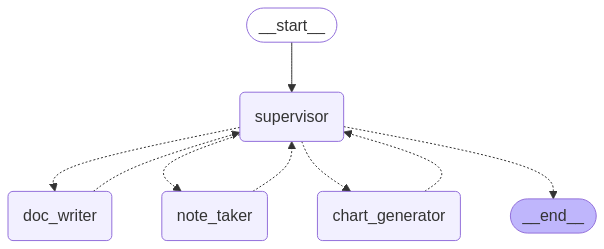

In [ ]:
from IPython.display import Image, display

# Відображення графіка написання статті
display(Image(paper_writing_graph.get_graph().draw_mermaid_png()))

In [ ]:
for s in paper_writing_graph.stream(
    {
        "messages": [
            (
                "user",
                "Напиши план віршика про котиків, а потім запиши віршик на диск."
                # "Write an outline for poem about cats and then write the poem to disk.",
            )
        ]
    },
    {"recursion_limit": 100},
):
    print(s)
    print("---")

{'supervisor': {'next': 'note_taker'}}
---
{'note_taker': {'messages': [HumanMessage(content='Я створив план для віршика про котиків і зберіг його у файлі "виршик_план.txt". Якщо потрібна подальша допомога або зміни, дайте знати!', additional_kwargs={}, response_metadata={}, name='note_taker', id='e5c54a54-ad01-4efe-861b-3f39ddab2271')]}}
---
{'supervisor': {'next': 'doc_writer'}}
---
{'doc_writer': {'messages': [HumanMessage(content='Віршик про котиків було збережено у файлі "виршик_про_котиків.txt". Якщо вам потрібні додаткові зміни або допомога, дайте знати!', additional_kwargs={}, response_metadata={}, name='doc_writer', id='0771818d-a2e3-4f59-97c9-80027eefd1e8')]}}
---
{'supervisor': {'next': '__end__'}}
---


## Додамо шарів

Нам потрібно БІЛЬШЕ ШАРІВ!!!!

У цьому дизайні ми впроваджуємо політику планування зверху вниз. Ми вже створили два графи, але ще потрібно вирішити, як маршрутизувати роботу між ними.

Ми створимо третій граф, який організує попередні два, і додамо кілька з'єднувачів, щоб визначити, як цей верхній рівень стану буде розподілятися між різними графами.

In [ ]:
from langchain_core.messages import BaseMessage

llm = ChatOpenAI(model="gpt-4o")

# Створення вузла наглядача для команд
teams_supervisor_node = make_supervisor_node(llm, ["research_team", "writing_team"])

In [ ]:
def call_research_team(state: State) -> Command[Literal["supervisor"]]:
    response = research_graph.invoke({"messages": state["messages"][-1]})
    return Command(
        update={
            "messages": [
                HumanMessage(
                    content=response["messages"][-1].content, name="research_team"
                )
            ]
        },
        goto="supervisor",
    )


def call_paper_writing_team(state: State) -> Command[Literal["supervisor"]]:
    response = paper_writing_graph.invoke({"messages": state["messages"][-1]})
    return Command(
        update={
            "messages": [
                HumanMessage(
                    content=response["messages"][-1].content, name="writing_team"
                )
            ]
        },
        goto="supervisor",
    )


# Визначаємо граф
super_builder = StateGraph(State)
super_builder.add_node("supervisor", teams_supervisor_node)
super_builder.add_node("research_team", call_research_team)
super_builder.add_node("writing_team", call_paper_writing_team)

super_builder.add_edge(START, "supervisor")
super_graph = super_builder.compile()

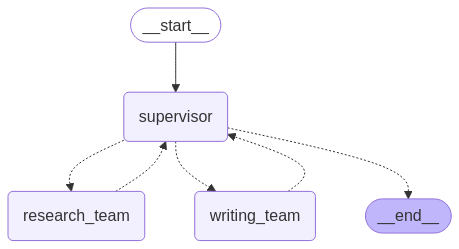

In [ ]:
from IPython.display import Image, display

# Відображення графіка у форматі PNG
display(Image(super_graph.get_graph().draw_mermaid_png()))

{'supervisor': {'next': 'research_team'}}
---
{'research_team': {'messages': [HumanMessage(content="AI-агенти в 2023 році стали важливим елементом технологій і бізнесу. Ринок AI-агентів активно зростає, і до 2025 року очікується, що його вартість досягне $150 мільярдів. Це зростання спричинене розвитком хмарних технологій, IoT-пристроїв та автоматизації.\n\nAI-агенти використовуються в різних галузях, таких як обслуговування клієнтів, охорона здоров'я та логістика, і навіть в креативній сфері. Вони здатні управляти складними завданнями, взаємодіяти з іншими агентами та обробляти мовленнєві дані. Відзначається значний прогрес у використанні великих мовних моделей (LLM) для розробки автономних AI-агентів.\n\nІндустрії активно впроваджують AI-агенти для покращення управління процесами і підвищення ефективності. Попит на такі рішення зростає в секторах фінансів, промисловості, роздрібної торгівлі та технологій.\n\nНа підставі цих факторів, AI-агенти не лише інтегровані в технологічну екоси

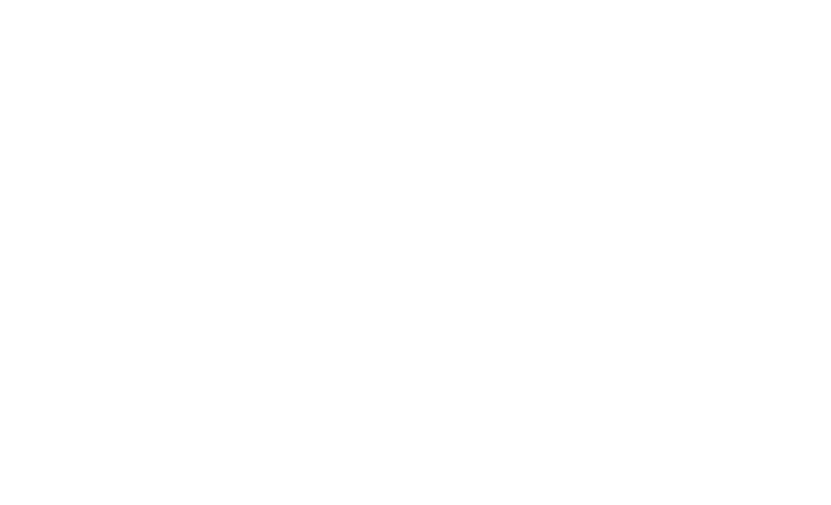

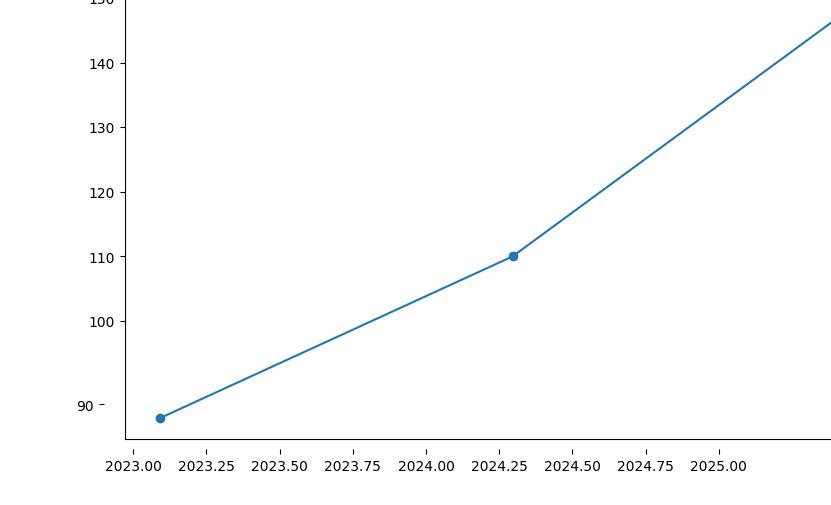

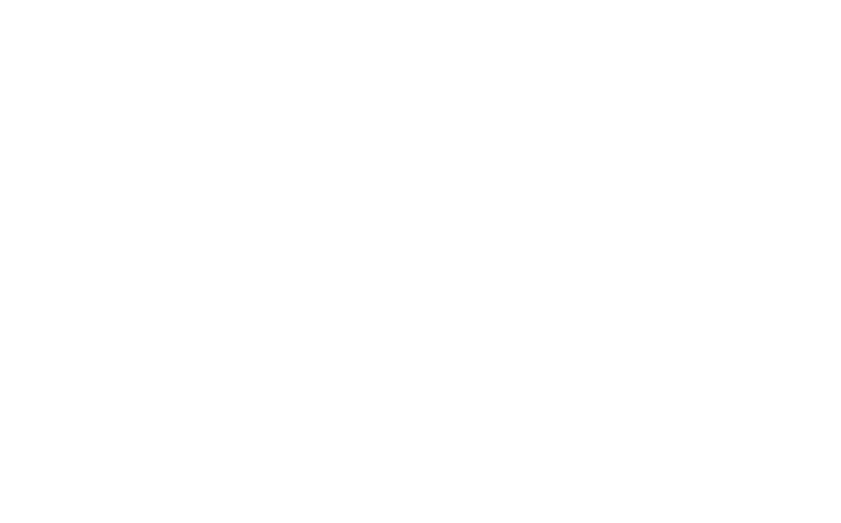

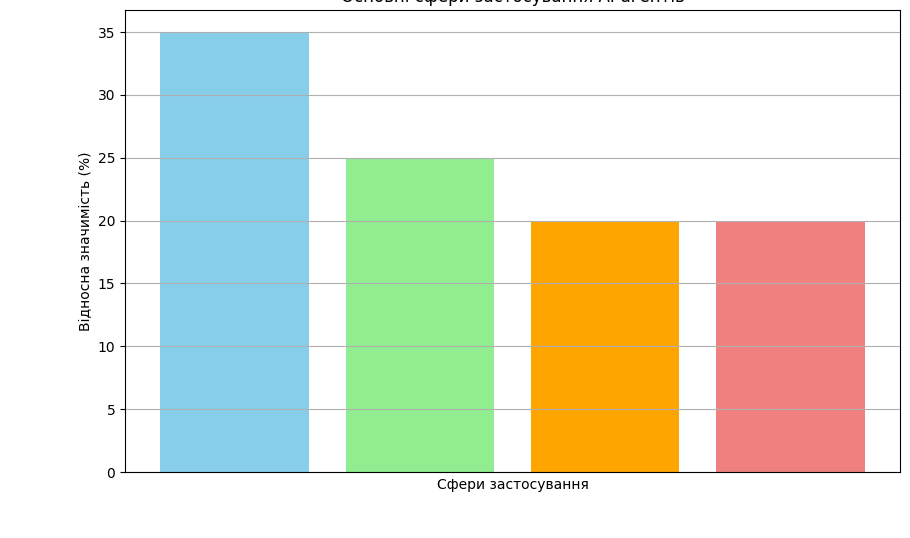

In [ ]:
for s in super_graph.stream(
    {
        "messages": [
            ("user", "Дослідіть тему AI-агентів і напишіть короткий звіт про їх поточний стан.")
        ],
    },
    {"recursion_limit": 150},
):
    print(s)
    print("---")


# Підсумуємо підходи, які ми розглянули

| Підхід | Як взаємодіють агенти | Памʼять | Ключовий елемент |
|--------|----------------------|---------|------------------|
| Collaboration | Спільний scratchpad | Загальна | Прямий обмін повідомленнями |
| Supervisor | Незалежні агенти + глобальний scratchpad | Локальна + загальна | Supervisor як маршрутизатор |
| Hierarchical Teams | Підграфи як агенти | Локальна + підграфова | Supervisor + вкладені підграфи |



## 📬 **Запрошую лишатись на звʼязку!**

Я активно розвиваю соцмережі і ділюсь там знаннями та інсайтами про роботу в **Data Science**, **Machine Learning** та шлях до того, щоб стати справді **крутим спеціалістом в ІТ**.

📲 Приєднуйтесь до мене в соцмережах, щоб:
- дізнаватись про нові можливості для розвитку,
- отримувати поради з кар'єри та технічні розбори,
- бути частиною спільноти однодумців 💡

🔗 **Мої ресурси:**

- 💜 [Instagram](https://www.instagram.com/hanna_pylieva/) — щоденне життя, поради, мотивація  
- 💼 [LinkedIn](https://www.linkedin.com/in/hanna-pylieva/) — карʼєра, кейси впровадження ML в бізнесі, сучасні інструменти і можливості в ML  
- ▶️ [YouTube](https://www.youtube.com/@hanna_pylieva) — відео про Data Science, машинне навчання і використання сучасних ШІ-моделей
- 📢 [Telegram-канал](https://t.me/hanna_pylieva_data_channel) — огляд технічних інструментів в форматі тексту
- 🎬 [TikTok](https://www.tiktok.com/@hanna_pylieva?_t=ZM-8uEWDPQ0zZ9&_r=1) — для тих, хто не любить інсту)) Тут менше особистого, більше порад по розвитку і про технології.


🔥 **Продовжуйте рости — ви вже на правильному шляху!**